In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
df_train=pd.read_excel('/content/Data_Train.xlsx')

In [431]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [432]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [433]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [434]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [435]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [436]:
df_train.shape

(10683, 11)

In [437]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [438]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [439]:
df_train.dropna(inplace=True)

In [440]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [441]:
df_train.shape

(10682, 11)

In [442]:
df_train['Journey_Day']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.day

In [443]:
df_train['Journey_Month']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.month

In [444]:
df_train['Journey_Year']=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.year

In [445]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_Day      10682 non-null  int64 
 12  Journey_Month    10682 non-null  int64 
 13  Journey_Year     10682 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [446]:
df_train.describe()

,Price,Journey_Day,Journey_Month,Journey_Year
count,10682.000000,10682.000000,10682.000000,10682.0
mean,9087.214567,13.509081,4.708575,2019.0
std,4611.548810,8.479363,1.164408,0.0
min,1759.000000,1.000000,3.000000,2019.0
25%,5277.000000,6.000000,3.000000,2019.0
50%,8372.000000,12.000000,5.000000,2019.0
75%,12373.000000,21.000000,6.000000,2019.0
max,79512.000000,27.000000,6.000000,2019.0


In [447]:
df_train['Journey_Year'].value_counts()

2019    10682
Name: Journey_Year, dtype: int64

In [448]:
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [449]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
 12  Journey_Year     10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [450]:
df_train.shape

(10682, 13)

In [451]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [452]:
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [453]:
df_train.drop('Dep_Time',axis=1,inplace=True)

In [454]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  Journey_Year     10682 non-null  int64 
 12  Dep_hour         10682 non-null  int64 
 13  Dep_min          10682 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.2+ MB


In [455]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [456]:
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [457]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [458]:
duration=list(df_train['Duration'])
for i in range(len(duration)):
  if('h' not in duration[i] or 'm' not in duration[i]):
    if('h' not in duration[i]):
      duration[i]='0h '+ duration[i]
    else:
      duration[i]=duration[i] + ' 0m'
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
  time=list(duration[i].split(' '))
  duration_hour.append(int(time[0][:-1]))
  duration_min.append(int(time[1][:-1]))

In [459]:
df_train['Duration_hour']=duration_hour
df_train['Duration_min']=duration_min
df_train.drop('Duration',axis=1,inplace=True)

In [460]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [461]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [462]:
df_train['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[int(1),int(0),int(2),int(3),int(4)],inplace=True)

In [463]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int64 
 8   Journey_Month    10682 non-null  int64 
 9   Journey_Year     10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
 14  Duration_hour    10682 non-null  int64 
 15  Duration_min     10682 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.4+ MB


Handling Categorial Data

In [464]:
df_train['Airline'].sort_values()

5833                   Air Asia
5007                   Air Asia
5006                   Air Asia
9883                   Air Asia
1052                   Air Asia
                 ...           
7505                    Vistara
2873                    Vistara
7657    Vistara Premium economy
426     Vistara Premium economy
8615    Vistara Premium economy
Name: Airline, Length: 10682, dtype: object

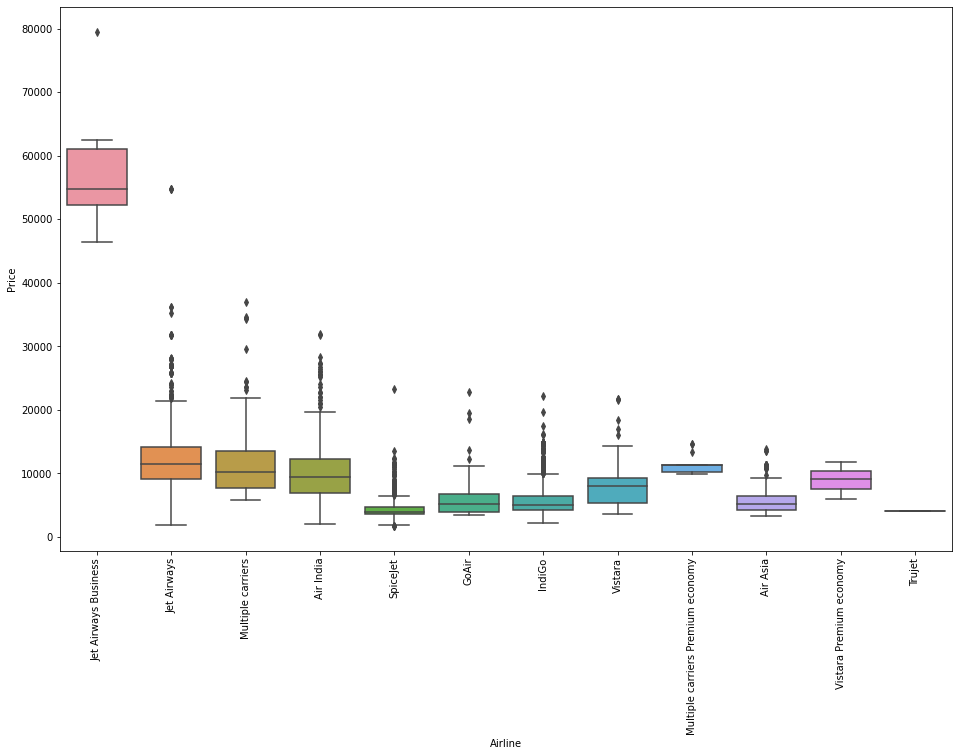

In [465]:
#airline vs price
plt.figure(figsize=(16,10))
sns.boxplot(x='Airline',y=df_train['Price'],data=df_train.sort_values("Price", ascending = False))
plt.xticks(rotation = 90)
plt.show()

we abserved that all the airline prices are normal but jetairlines have a higher price compared to others

In [466]:
# as airlines is Nominal Categorial data we will perform onehot encoding

Airline=pd.get_dummies(df_train[['Airline']],drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [467]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int64 
 8   Journey_Month    10682 non-null  int64 
 9   Journey_Year     10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
 14  Duration_hour    10682 non-null  int64 
 15  Duration_min     10682 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.6+ MB


In [468]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

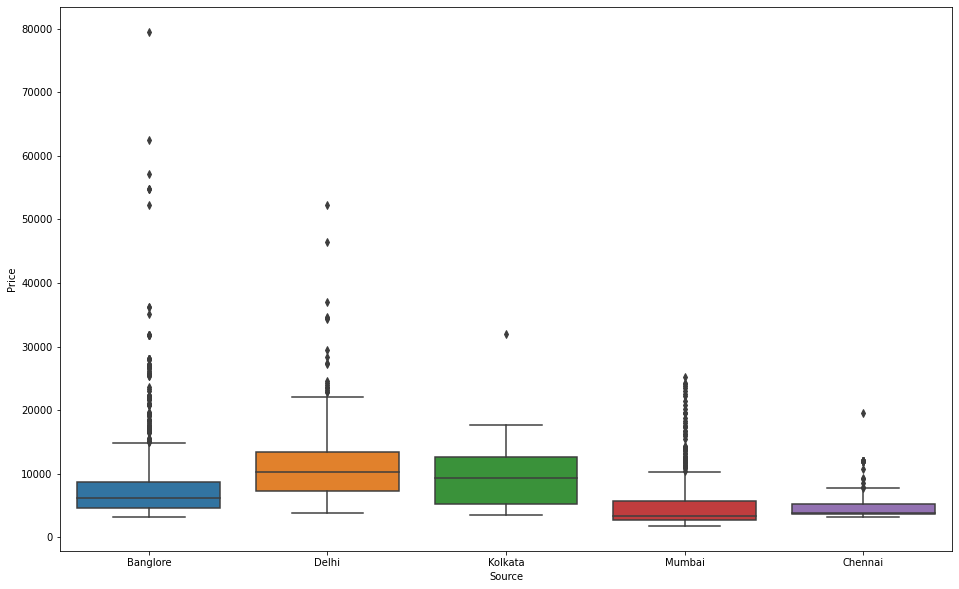

In [469]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Source',y=df_train['Price'].sort_values(),data=df_train.sort_values("Price", ascending = False))

plt.show()

In [470]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,16,50,21,35,4,45


In [471]:

# as Source is Nominal Categorial data we will perform onehot encoding
Source=df_train[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [472]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

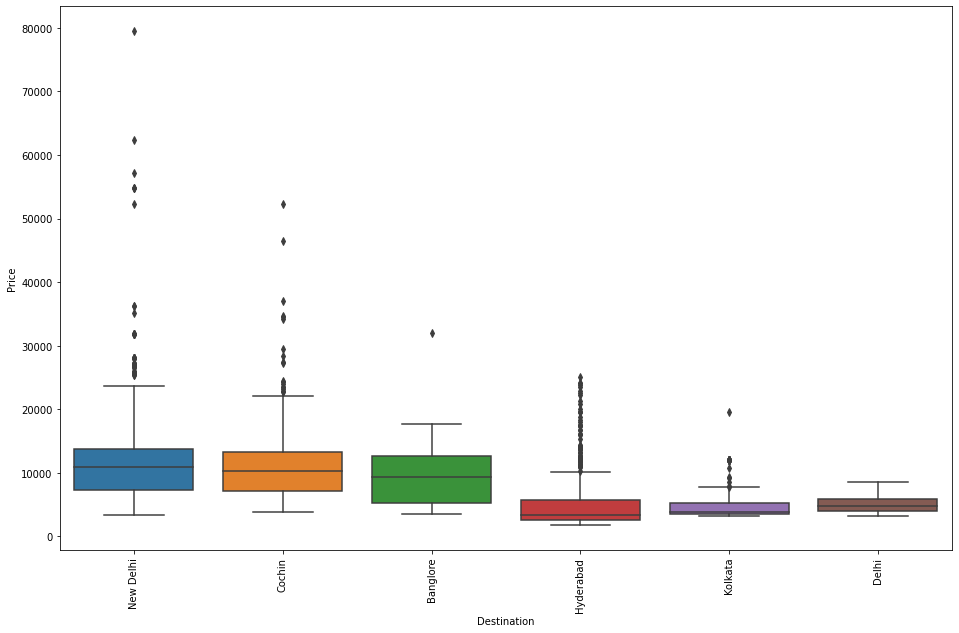

In [473]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Destination',y=df_train['Price'].sort_values(),data=df_train.sort_values("Price", ascending = False))
plt.xticks(rotation = 90)
plt.show()

In [474]:
# as destination is Nominal Categorial data we will perform onehot encoding

Destination=pd.get_dummies(df_train[['Destination']],drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [475]:
df_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [476]:
df_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [477]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [478]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Total_Stops    10682 non-null  int64 
 4   Price          10682 non-null  int64 
 5   Journey_Day    10682 non-null  int64 
 6   Journey_Month  10682 non-null  int64 
 7   Journey_Year   10682 non-null  int64 
 8   Dep_hour       10682 non-null  int64 
 9   Dep_min        10682 non-null  int64 
 10  Arrival_hour   10682 non-null  int64 
 11  Arrival_min    10682 non-null  int64 
 12  Duration_hour  10682 non-null  int64 
 13  Duration_min   10682 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.5+ MB


In [479]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [480]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45


In [481]:
df_train=pd.concat([df_train,Airline,Source,Destination],axis=1)

In [482]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [483]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_Day                                10682 non-null  int64
 3   Journey_Month                              10682 non-null  int64
 4   Journey_Year                               10682 non-null  int64
 5   Dep_hour                                   10682 non-null  int64
 6   Dep_min                                    10682 non-null  int64
 7   Arrival_hour                               10682 non-null  int64
 8   Arrival_min                                10682 non-null  int64
 9   Duration_hour                              10682 non-null  int64
 10  Duration_min                               106

In [484]:
df_train.shape

(10682, 31)

# Test set

In [485]:
test_data=pd.read_excel('/content/Test_set.xlsx')

In [486]:
print("Test data Info")

Test data Info


In [487]:
print(test_data.isnull().sum())
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [488]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [489]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [490]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [491]:
duration = list(test_data["Duration"])
for i in range(len(duration)):
  if('h' not in duration[i] or 'm' not in duration[i]):
    if('h' not in duration[i]):
      duration[i]='0h '+ duration[i]
    else:
      duration[i]=duration[i] + ' 0m'
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
  time=list(duration[i].split(' '))
  duration_hour.append(int(time[0][:-1]))
  duration_min.append(int(time[1][:-1]))

In [492]:
test_data["Duration_hours"] = duration_hour
test_data["Duration_mins"] = duration_min
test_data.drop(["Duration"], axis = 1, inplace = True)


In [493]:
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [494]:
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [495]:
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [496]:
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [497]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [498]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [499]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 28)


In [500]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [501]:
df_train.drop('Journey_Year',axis=1,inplace=True)

Feature Engineering
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

heatmap

feature_importance_

SelectKBest



In [502]:
df_train.shape

(10682, 30)

In [503]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [504]:
##independent features
x=df_train.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [505]:
y=df_train['Price']

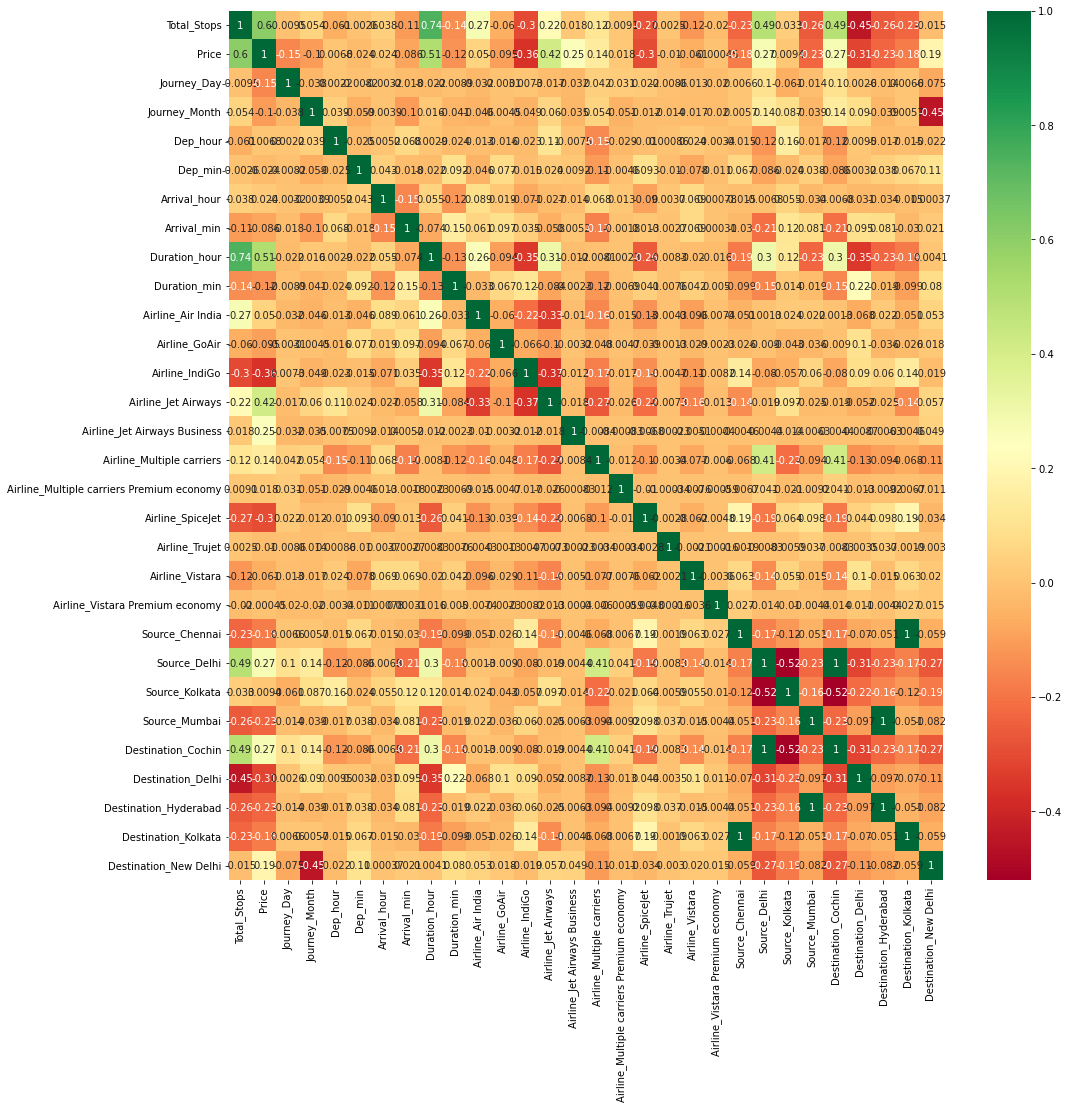

In [506]:
#finding co-relation between independent and dependent attributes using one hot encoding

plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(),annot=True, cmap = "RdYlGn")
plt.show()

In [507]:
#FITTING MODEL USING RANDOM FOREST ALGORITHM
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [508]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 29)
(2137, 29)
(8545,)
(2137,)


In [509]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [510]:
y_pred=reg.predict(x_test)

In [511]:
reg.score(x_train,y_train)

0.9529636590331619

In [512]:
reg.score(x_test,y_test)

0.7967777086894906

In [513]:
from sklearn import metrics

In [514]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.5972414664054
MSE: 4381890.491562418
RMSE: 2093.296560825154


In [515]:
metrics.r2_score(y_test, y_pred)

0.7967777086894906

HYPERPARAMETER TURING

In [516]:
from sklearn.model_selection import RandomizedSearchCV

In [517]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [518]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [519]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,random_state=42,n_jobs=1) 

In [520]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [521]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [522]:
prediction = rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


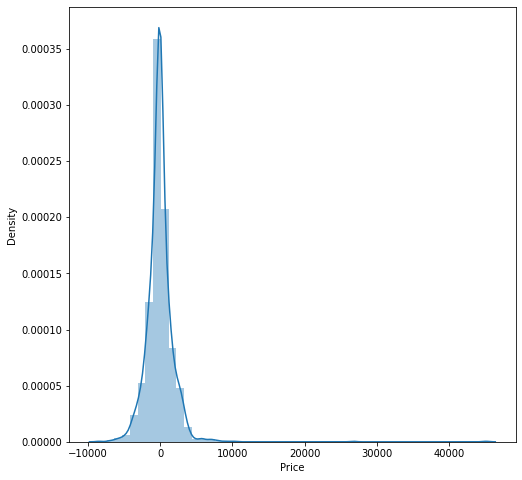

In [523]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

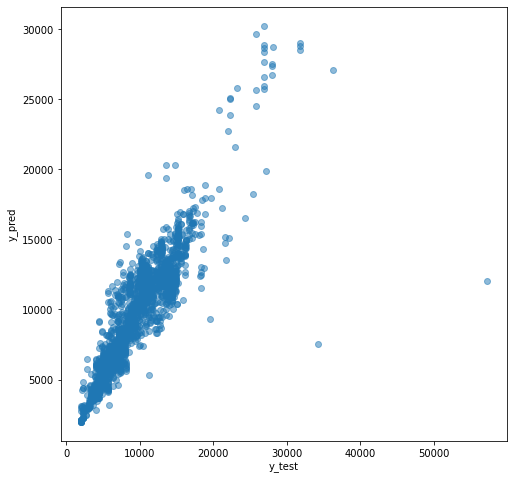

In [524]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [525]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.7205124779455
MSE: 4049097.782614139
RMSE: 2012.2370095528356


In [526]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)

In [527]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [528]:
y_prediction = forest.predict(x_test)

In [529]:
metrics.r2_score(y_test, y_prediction)

0.7967777086894906